# curve fitting

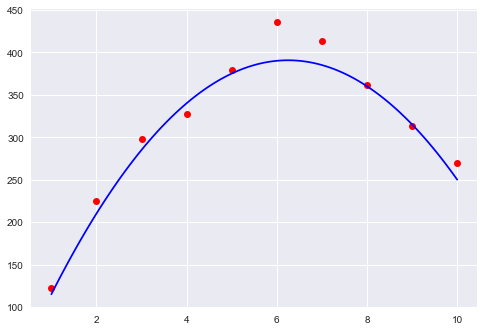

10.352393104914817 -24.864156290495387 386.9705648704695


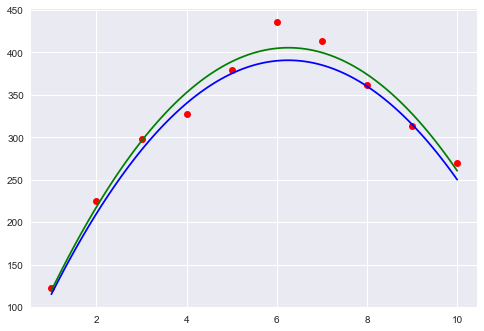

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize

f = lambda x: 10*x*(12-x) + 5*x    # which is 125*x-10*x*x
x = np.arange(1., 11., 1.)
y = np.array([random.gauss(f(t), f(t)/20) for t in x])
t = np.linspace(1., 10., 100)

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(x, y, 'ro', t, f(t), 'b-')
plt.show()

def mismatch(p):
    (a, b, c) = p
    g = lambda x: a*x*(b-x)+c*x
    ycalc = g(x)
    d = ycalc - y
    d = d*d
    return d.sum()

p0 = (1, 1, 1)
res = minimize(mismatch, p0, method='BFGS')
(a, b, c) = res.x
print(a, b, c)

g = lambda x: a*x*(b-x)+c*x
fig, ax = plt.subplots()
ax.plot(x, y, 'ro', t, f(t), 'b-', t, g(t), 'g-')
plt.show()

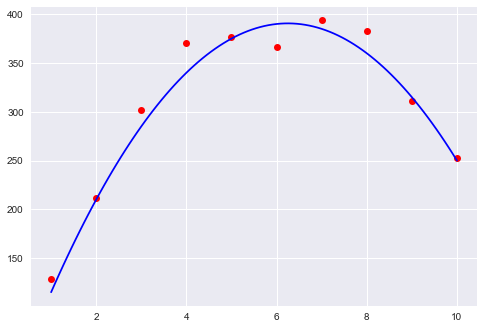

128.76161156008982 10.381851905264408


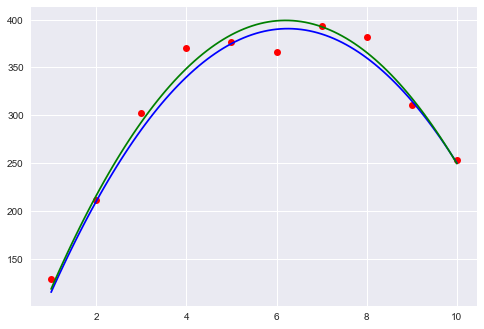

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.optimize import minimize

f = lambda x: 10*x*(12-x) + 5*x    # which is 125*x-10*x*x
x = np.arange(1., 11., 1.)
y = np.array([random.gauss(f(t), f(t)/20) for t in x])
t = np.linspace(1., 10., 100)

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(x, y, 'ro', t, f(t), 'b-')
plt.show()

def mismatch(p):
    (a, b) = p
    g = lambda x: a*x - b*x*x
    ycalc = g(x)
    d = ycalc - y
    d = d*d
    return d.sum()

p0 = (1, 1)
res = minimize(mismatch, p0, method='BFGS')
(a, b) = res.x
print(a, b)

g = lambda x: a*x - b*x*x
fig, ax = plt.subplots()
ax.plot(x, y, 'ro', t, f(t), 'b-', t, g(t), 'g-')
plt.show()

# use numpy.loadtxt to read csv data file

In [3]:
import numpy as np
t, I = np.loadtxt('lumi1.csv', delimiter=',', unpack=True)
for i in range(10):
    print(t[i], I[i])

-0.500105008 0.05541705
-0.490105008 0.017018592
-0.480105008 0.030884676
-0.470105008 0.055417039
-0.460105008 0.025551587
-0.450105008 0.005285674
-0.440105008 0.059683565
-0.430105008 0.017018532
-0.420105008 0.002085817
-0.410105008 0.043684181


# curve fitting for luminescence decay

data files: lumi1.csv, lumi2.csv

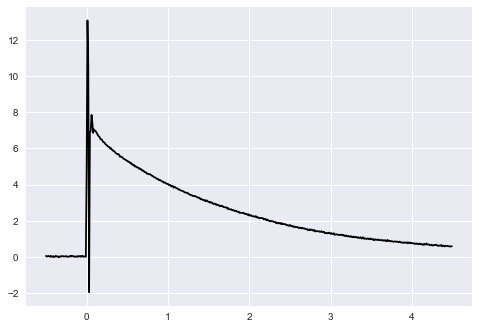

[7.07055835 1.7434224  0.04121659]


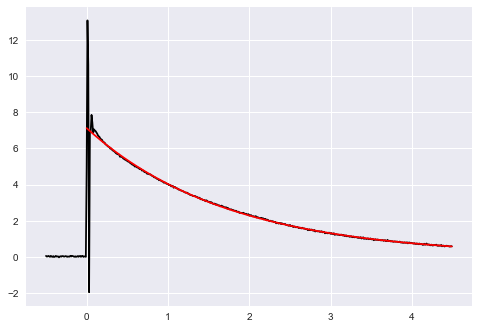

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

t, I = np.loadtxt('lumi1.csv', delimiter=',', unpack=True)
#print(t,I)
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(t, I, 'k-')
plt.show()

t1 = 0.11
n1 = int((t1-t[0])/(t[1]-t[0]))
n0 = int((0-t[0])/(t[1]-t[0]))

def mismatch(p):
    a, tau, b = p
    f = lambda x: a*np.exp(-x/tau) + b
    Icalc = f(t[n1:])
    d = I[n1:] - Icalc
    return (d*d).sum()

p0 = 7, 1, 0.01
res = minimize(mismatch, p0, method='BFGS')
print(res.x)

a, tau, b = res.x
f = lambda x: a*np.exp(-x/tau) + b
fig, ax = plt.subplots()
ax.plot(t, I, 'k-', t[n0:], f(t[n0:]), 'r-')
plt.show()

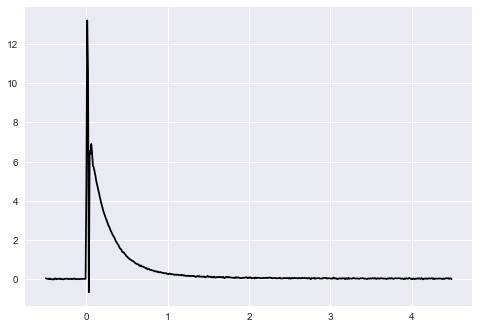

[7.72905181 0.26044658 0.06631193]


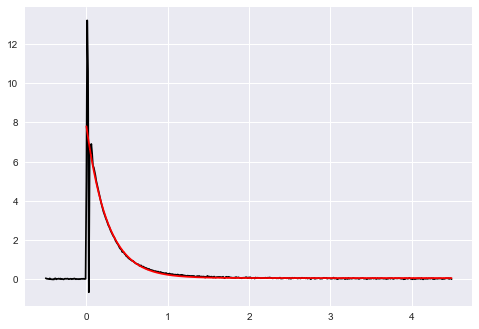

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

t, I = np.loadtxt('lumi2.csv', delimiter=',', unpack=True)

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(t, I, 'k-')
plt.show()

t1 = 0.11
n1 = int((t1-t[0])/(t[1]-t[0]))
n0 = int((0-t[0])/(t[1]-t[0]))

def mismatch(p):
    a, tau, b = p
    f = lambda x: a*np.exp(-x/tau) + b
    Icalc = f(t[n1:])
    d = I[n1:] - Icalc
    return (d*d).sum()

p0 = 7, 1, 0.01
res = minimize(mismatch, p0, method='BFGS')
print(res.x)

a, tau, b = res.x
f = lambda x: a*np.exp(-x/tau) + b
fig, ax = plt.subplots()
ax.plot(t, I, 'k-', t[n0:], f(t[n0:]), 'r-')
plt.show()